Prix de l’option: 7.554869751703142
Black-Scholes Price: 8.3336


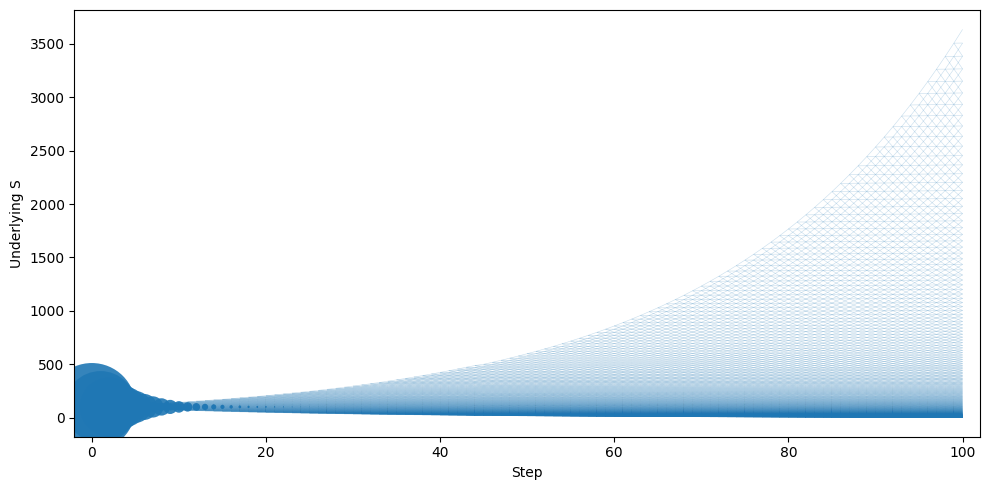

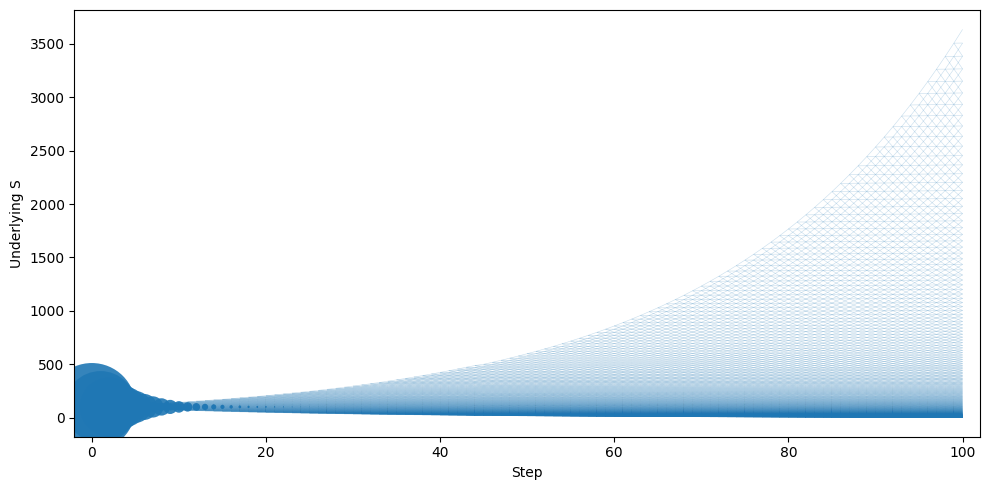

In [1]:
# debut du div, americain, avancer sur convergence

from pricing import BlackScholesPricer, TrinomialTree, Market, Option
from pricing import convergence
from pricing import graphique
import datetime as dt
import sys

sys.setrecursionlimit(100000)
market = Market(S0=100, r=0.03, sigma=0.2, dividend=1.5, dividend_date=dt.datetime(2026, 3, 30))
option = Option(K=103, option_type="call", maturity=dt.datetime(2026, 10, 30), option_class="european")
tree = TrinomialTree(market, option, N=100)

price = tree.price()
print("Prix de l’option:", price)

bs_price = BlackScholesPricer().price(S=market.S0, K=option.K, T=tree.delta_t*tree.N, r=market.r, q=0, sigma=market.sigma, option_type='call') # q=0 car pas de dividendes
print("Black-Scholes Price: {:.4f}".format(bs_price))

graphique.plot_tree(tree.root)
# convergence.bs_convergence_by_strike(market, option, [80, 90, 100, 110, 120, 130, 140, 150, 160], N=100)

# convergence.bs_convergence_by_step(market, option, bs_price, max_n = 1000, step = 100)

In [3]:
delta_t = (tree.option.maturity - tree.pricing_date).days / tree.N / 365

In [4]:
delta_t

0.010684931506849314

In [5]:
(tree.option.maturity - tree.pricing_date).days

390

In [6]:
round(((self.market.dividend_date - self.pricing_date).days / 365 / self.delta_t) - 0.5)

NameError: name 'self' is not defined